In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import io
import random

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from PIL import Image


### Images import
To import images, I had to upload them to my Google Drive and unzip from there.

In [4]:
# Data import
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Images unzipping
!unzip gdrive/My\ Drive/data/images.zip

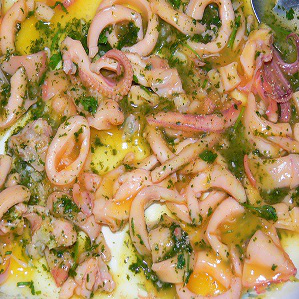

In [6]:
# Checking not a hot dog
img = load_img('hotdog-nothotdog/train/nothotdog/3762.jpg')
img

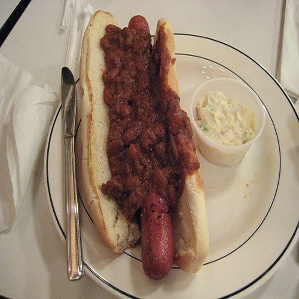

In [7]:
# Checking hot dog
img = load_img('hotdog-nothotdog/test/hotdog/1618.jpg')
img

To import image data I did a loop going over each file, converting it into an array and labeling as hot dog or not hotdog. There are 4 loops for each directory. Inspiration on data import came from [here](https://www.kaggle.com/code/zez000/deep-learning-hotdogs) and was adapted to using Google Drive to import data into colab.

In [8]:
# Train hotdogs
files = os.listdir('hotdog-nothotdog/train/hotdog')
dir = 'hotdog-nothotdog/train/hotdog/'
train = []
index = 0

for file in files:
    img = Image.open(dir + file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    train.append((imgarray,1))

# Train nothotdogs
files=os.listdir('hotdog-nothotdog/train/nothotdog')
dir = 'hotdog-nothotdog/train/nothotdog/'
index = 0
for file in files:
    img = Image.open(dir + file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    train.append((imgarray,0))

print(f'Training data: {len(train)} pictures added')

Training data: 3000 pictures added


In [9]:
# Test hotdogs
files = os.listdir('hotdog-nothotdog/test/hotdog')
dir = 'hotdog-nothotdog/test/hotdog/'
test = []

for file in files:
    img = Image.open(dir + file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    test.append((imgarray,1))

# Test nothotdogs
files=os.listdir('hotdog-nothotdog/test/nothotdog')
dir = 'hotdog-nothotdog/test/nothotdog/'

for file in files:
    img = Image.open(dir + file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    test.append((imgarray,0))

print(f'Test data: {len(test)} pictures added')

Test data: 644 pictures added


In [10]:
# Checking output shape
train[0][0].shape

(128, 128, 3)

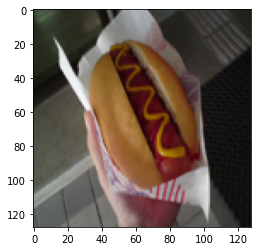

In [11]:
# Checking conversion result
plt.imshow(train[55][0]/255);

### Data Preprocessing
Included separating data from labels and some standard imagery data preprocessing like datatype conversion and pixel values normalization

In [12]:
# Shuffling data for better model performance
random.shuffle(train)
random.shuffle(test)

# Separating label from pixels
X_train = np.array([x[0] for x in train])
y_train = np.array([x[1] for x in train])
X_test = np.array([x[0] for x in test])
y_test =  np.array([x[1] for x in test])

# Converting from uint8 to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing pixel values
X_train = X_train/255
X_test = X_test/255

In [44]:
# Checking baseline
np.mean(y_train), np.mean(y_test)

(0.5, 0.5)

### Modeling
I Created a CNN model with 4 convolutional layers and added dropout after every layer to avoid overfitting.

In [16]:
# Creating Convolutional Neural Network
model = Sequential()

# Input layer
model.add(Input(shape=(128,128,3))) # image size is 128 x 128

# First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

# Second Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

# Third Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.3))

# Forth Convolution
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.4))

# Flatten
model.add(Flatten())

# Dense layer 
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

# Output
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 30, 30, 64)       

In [18]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
30/30 [==============================] - 10s 62ms/step - loss: 0.7014 - accuracy: 0.5030
Epoch 2/50
30/30 [==============================] - 2s 69ms/step - loss: 0.6831 - accuracy: 0.5727
Epoch 3/50
30/30 [==============================] - 2s 64ms/step - loss: 0.6440 - accuracy: 0.6407
Epoch 4/50
30/30 [==============================] - 2s 54ms/step - loss: 0.6235 - accuracy: 0.6493
Epoch 5/50
30/30 [==============================] - 2s 54ms/step - loss: 0.6038 - accuracy: 0.6730
Epoch 6/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5879 - accuracy: 0.6913
Epoch 7/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5683 - accuracy: 0.7053
Epoch 8/50
30/30 [==============================] - 2s 54ms/step - loss: 0.5600 - accuracy: 0.7167
Epoch 9/50
30/30 [==============================] - 2s 68ms/step - loss: 0.5521 - accuracy: 0.7233
Epoch 10/50
30/30 [==============================] - 2s 61ms/step - loss: 0.5416 - accuracy: 0.7260
Epoch 11

In [33]:
test_eval = model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 11ms/step - loss: 0.7996 - accuracy: 0.7578


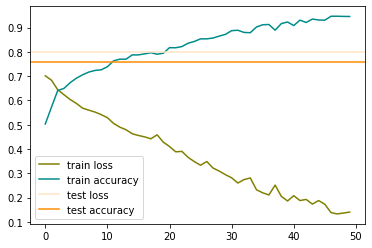

In [39]:
plt.plot(history.history['loss'], label = 'train loss', c = 'olive')
plt.plot(history.history['accuracy'], label = 'train accuracy', c = 'darkcyan')
plt.axhline(y = test_eval[0], label = 'test loss', c = 'bisque')
plt.axhline(y = test_eval[1], label = 'test accuracy', c = 'darkorange')
plt.legend();

In [34]:
test_eval

[0.79961758852005, 0.7577639818191528]

In [21]:
preds = model.predict(X_test)

21/21 [==============================] - 0s 12ms/step


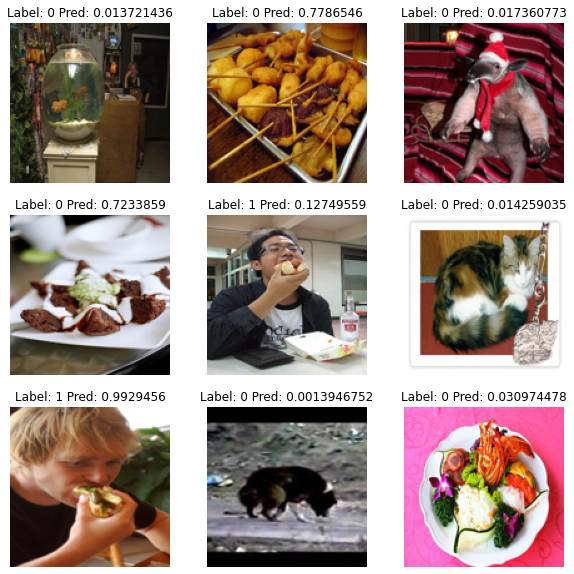

In [40]:
# Visualization idea also from here, I really liked this idea
# https://www.kaggle.com/code/zez000/deep-learning-hotdogs
plt.figure(figsize=(10, 10)) # canvas

offset = 50 # by changing this value you can see different subset of images
for pic in range(0,9): # 9 pictures
    ax = plt.subplot(3, 3, pic + 1) # arranging plot by 3x3 pictures
    plt.imshow(X_test[pic+offset]) # plotting a picture
    plt.title("Label: "+str(y_test[pic+offset])+" Pred: "+str(preds[pic+offset][0]))
    plt.axis("off")

In [45]:
# Saving model as pickle
import joblib

joblib.dump(model, open('model.pkl', 'wb'))